### Signal Processing Showcase and Exploration 
Extracting the envelope through different data processing methodologies

In [1]:
import src
from scipy.io import loadmat, whosmat
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt 
import os
import pandas as pd
import plotly.express as px
from src import config
from src import *
import re

In [2]:
# Choose the database to analyze
database = 'DB4'

# Define the .mat file name to load
filename = 'S1_E1_A1.mat'
# Define the subject associated with the file
subject  = 's1'
# Load the .mat file using the loadmatNina function
# Parameters: database, file name, and subject
mat_file = src.loadmatNina(database, filename, subject=subject)

Loaded file: S1_E1_A1.mat
Total test time: 619.6915 seconds
Total test time: 10.328191666666667 minutes
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
Total EMG samples: 14872596.0
Frequency: 2000 Hz
Summary for the whole file:
        __globals__           emg      stimulus  subject    repetition   age  \
25%             NaN -8.996921e+01  0.000000e+00      1.0  0.000000e+00  29.0   
50%             NaN -4.555057e+00  3.000000e+00      1.0  2.000000e+00  29.0   
75%             NaN  7.687926e+01  8.000000e+00      1.0  4.000000e+00  29.0   
count           0.0  1.487260e+07  1.239383e+06      1.0  1.239383e+06   1.0   
freq            NaN           NaN           NaN      NaN           NaN   NaN   
max             NaN  3.011400e+04  1.200000e+01      1.0  6.000000e+00  29.0   
mean            NaN -5.482289e+00  4.090893e+00      1.0  2.203224e+00  29.0   
min             NaN -2.516700e+04  0.000000e+00      1.0  0.000000e+00  29.0   
std             NaN  7.292349e+0

In [3]:
# Builds a DataFrame and extracts grasp data from the loaded .mat file.
# Parameters:
# - mat_file: previously loaded .mat file.
# - database: database the file belongs to.
# - filename: name of the .mat file.
# - rectify: disables data rectification (False).
# - normalize: enables data normalization (True).
test_df, grasps = src.build_dataframe(mat_file, database, filename, normalize=False)
df_norm, grasps = src.build_dataframe(mat_file, database, filename, normalize=True)

New exercise label: A
Relabeling performed for exercise 1 of DB4.
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
New restimulus values in Relabeled: [ 0 50 51 52 53 54 55 56 57 58 59 60 61]
New exercise label: A
Relabeling performed for exercise 1 of DB4.
Unique restimulus values: [ 0  1  2  3  4  5  6  7  8  9 10 11 12]
New restimulus values in Relabeled: [ 0 50 51 52 53 54 55 56 57 58 59 60 61]


Extracting data without rest!
Filtered EMG data shape: (20387, 12)
Filtered restimulus data shape: (20387, 1)
test time: 10.1935 seconds
Number of Repetitions: 0


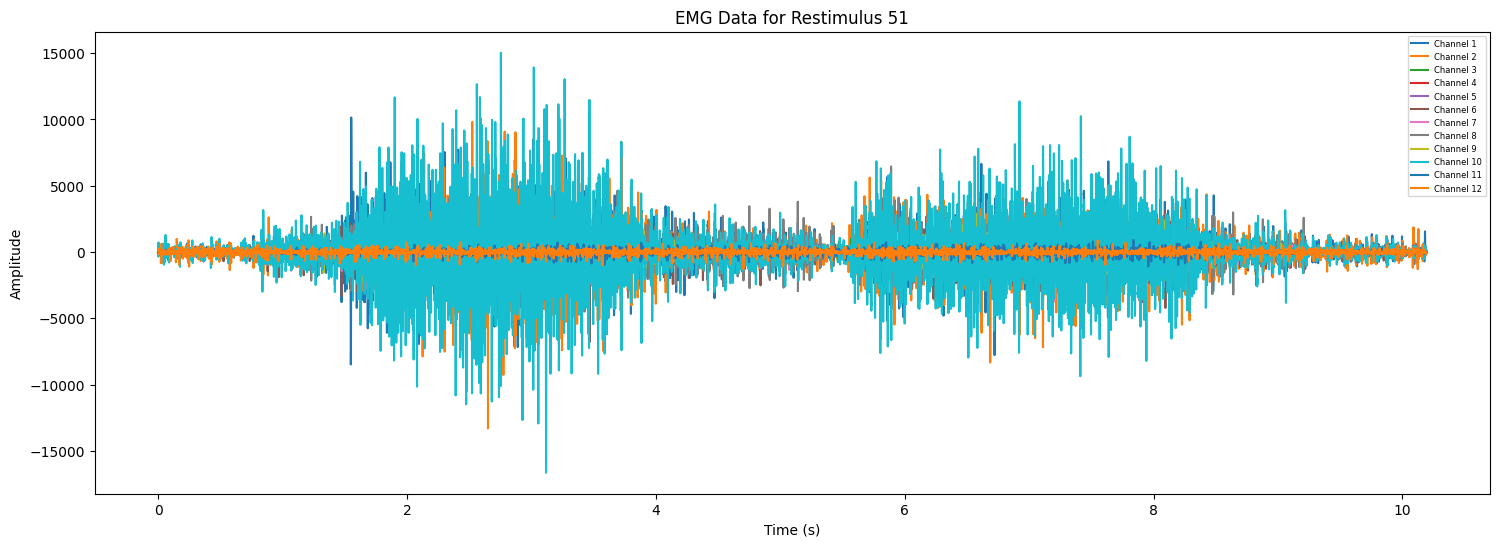

1: Max= 95.94 Hz, Med= 148.53 Hz, Cen= 185.93 Hz
2: Max= 91.23 Hz, Med= 137.93 Hz, Cen= 173.82 Hz
3: Max= 74.46 Hz, Med= 121.84 Hz, Cen= 162.23 Hz
4: Max= 67.40 Hz, Med= 123.41 Hz, Cen= 170.13 Hz
5: Max= 61.51 Hz, Med= 127.92 Hz, Cen= 167.14 Hz
6: Max= 152.25 Hz, Med= 170.21 Hz, Cen= 201.86 Hz
7: Max= 100.36 Hz, Med= 163.54 Hz, Cen= 198.93 Hz
8: Max= 134.79 Hz, Med= 209.45 Hz, Cen= 231.60 Hz
9: Max= 61.12 Hz, Med= 94.08 Hz, Cen= 136.26 Hz
10: Max= 85.45 Hz, Med= 135.67 Hz, Cen= 170.37 Hz
11: Max= 36.40 Hz, Med= 82.11 Hz, Cen= 140.11 Hz
12: Max= 60.82 Hz, Med= 117.23 Hz, Cen= 161.81 Hz


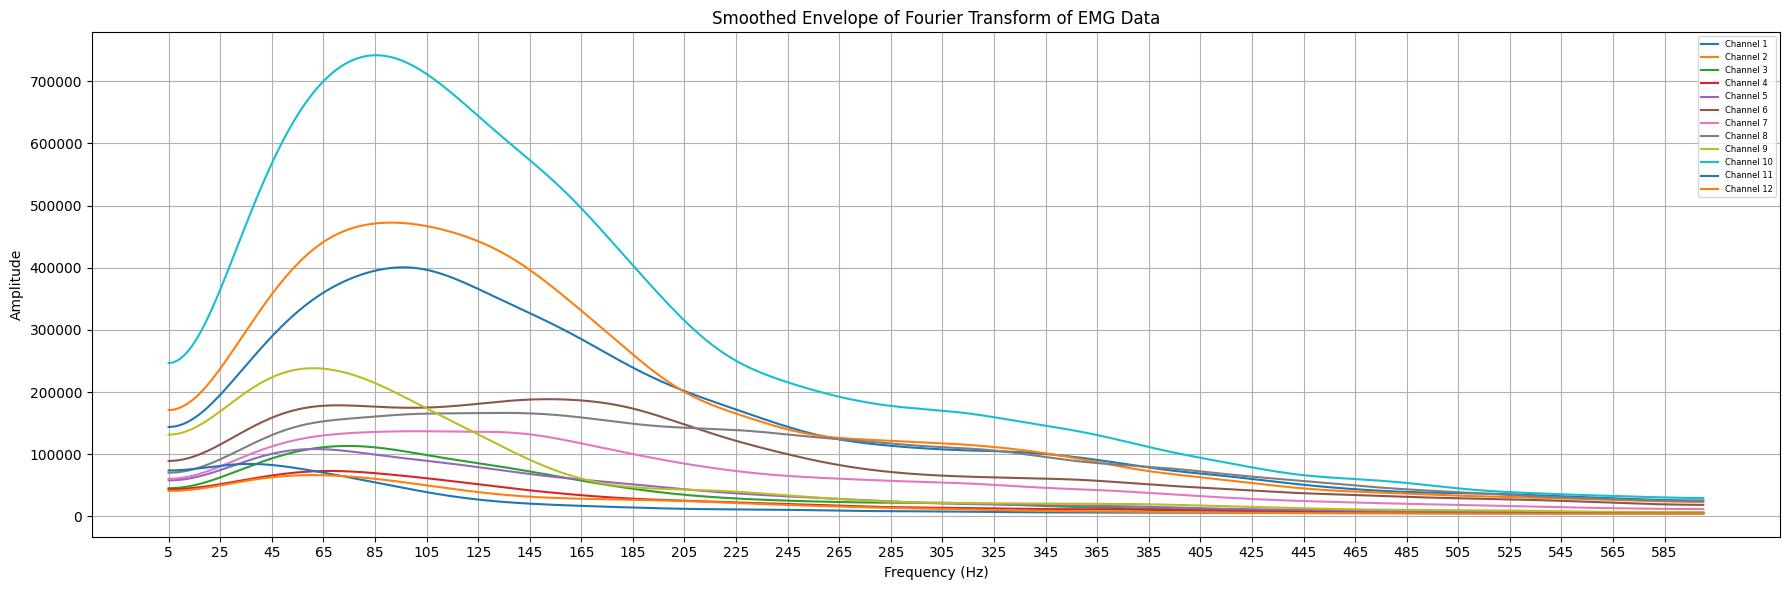

In [4]:
test_time = 17
grasp = 51

src.plot_emg_dataframe(database, test_df, grasp, length=test_time, addFourier=True, fourier_sigma=180) 

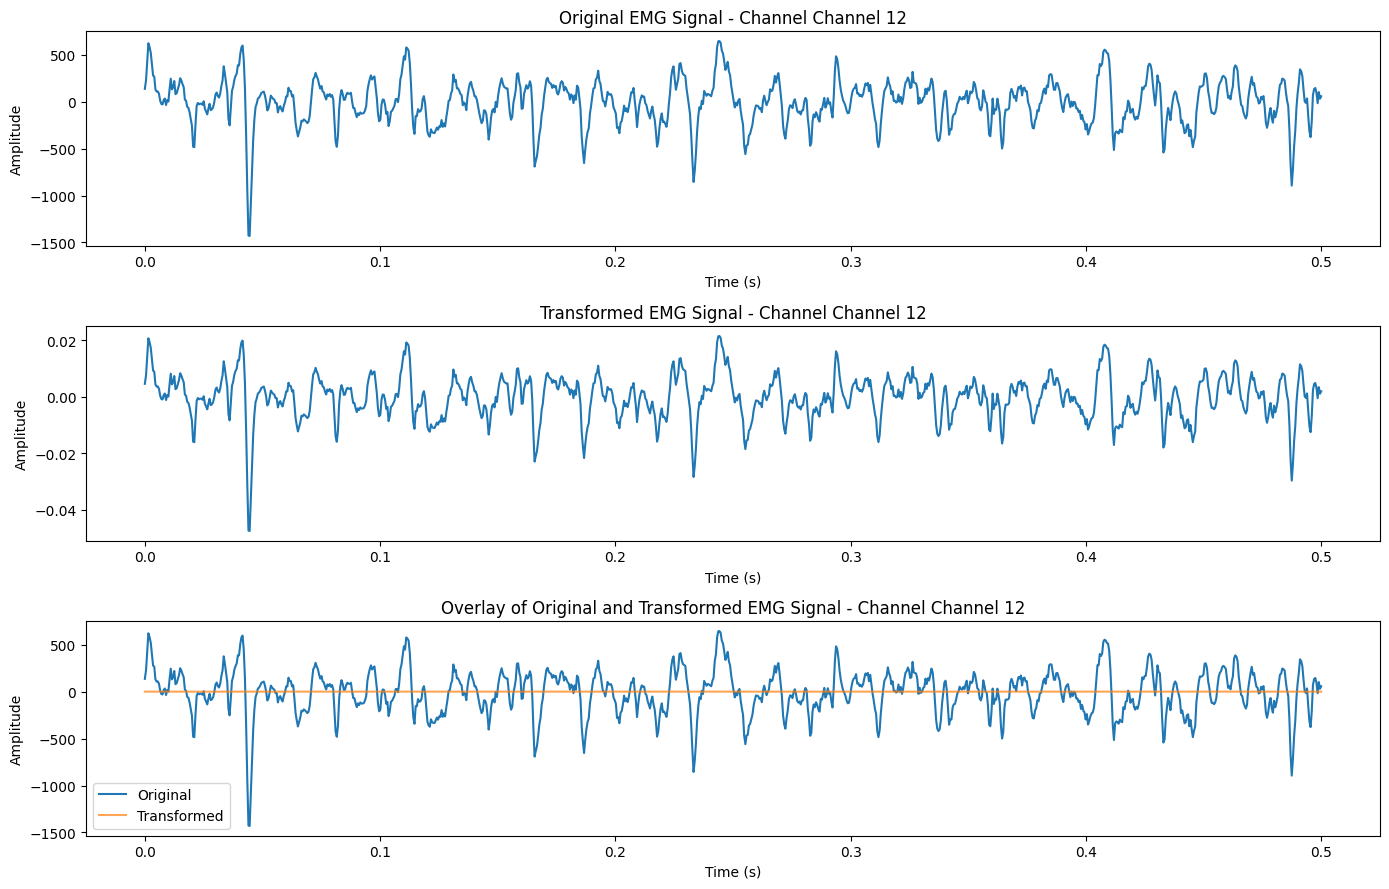

In [5]:
src.plot_single_emg_channel(database, test_df, df_norm, "Channel 12")

Extracting data without rest!
Filtered EMG data shape: (20387, 12)
Filtered restimulus data shape: (20387, 1)
test time: 10.1935 seconds
Number of Repetitions: 0


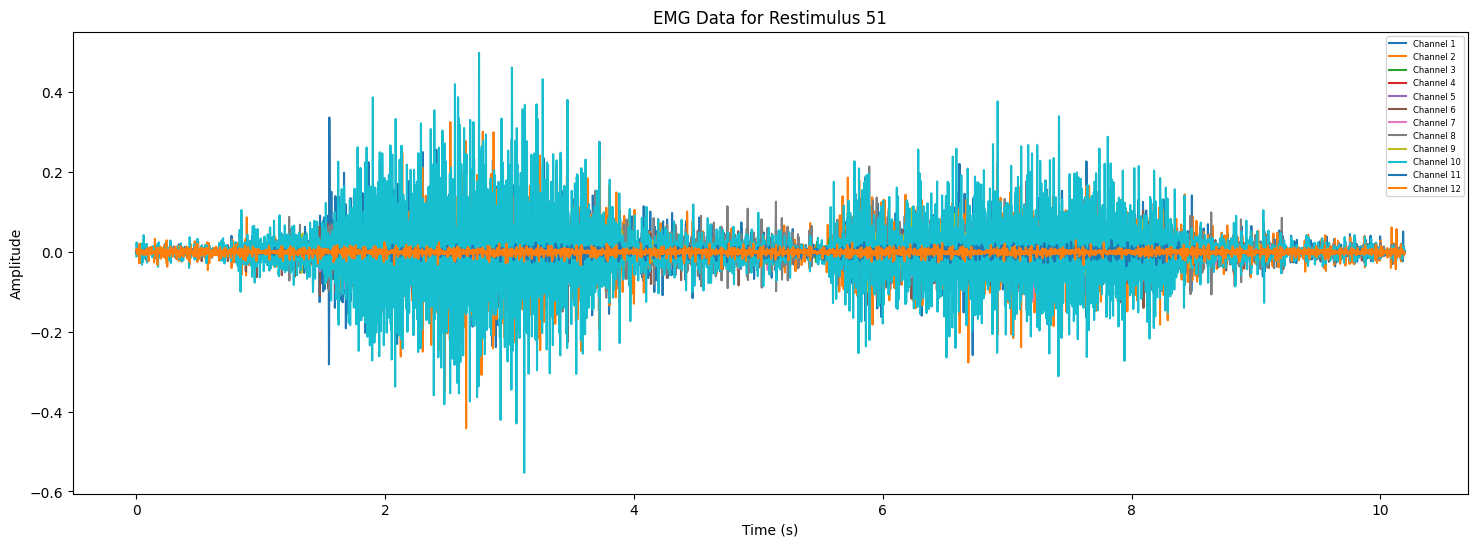

1: Max= 102.12 Hz, Med= 148.04 Hz, Cen= 185.79 Hz
2: Max= 86.82 Hz, Med= 137.24 Hz, Cen= 173.67 Hz
3: Max= 69.16 Hz, Med= 120.96 Hz, Cen= 162.02 Hz
4: Max= 78.87 Hz, Med= 122.04 Hz, Cen= 169.80 Hz
5: Max= 52.58 Hz, Med= 126.94 Hz, Cen= 166.86 Hz
6: Max= 181.19 Hz, Med= 170.01 Hz, Cen= 201.72 Hz
7: Max= 95.94 Hz, Med= 162.36 Hz, Cen= 198.79 Hz
8: Max= 138.81 Hz, Med= 209.35 Hz, Cen= 231.52 Hz
9: Max= 52.39 Hz, Med= 92.22 Hz, Cen= 135.86 Hz
10: Max= 68.77 Hz, Med= 134.89 Hz, Cen= 170.23 Hz
11: Max= 27.37 Hz, Med= 80.05 Hz, Cen= 139.33 Hz
12: Max= 63.77 Hz, Med= 115.17 Hz, Cen= 161.44 Hz


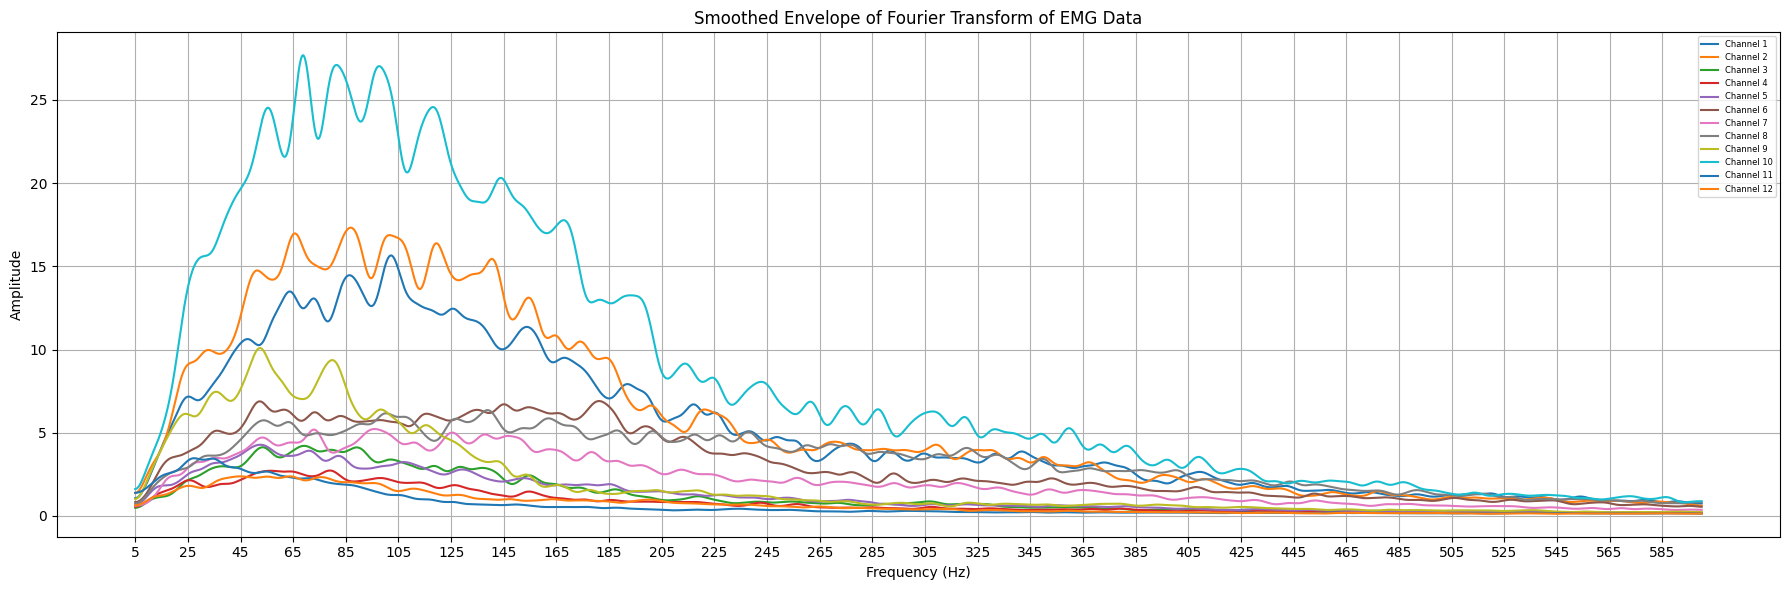

In [6]:
src.plot_emg_dataframe(database, df_norm, grasp, length=test_time, addFourier=True) 

Extracting data without rest!
Filtered EMG data shape: (20387, 12)
Filtered restimulus data shape: (20387, 1)
test time: 10.1935 seconds
Number of Repetitions: 0


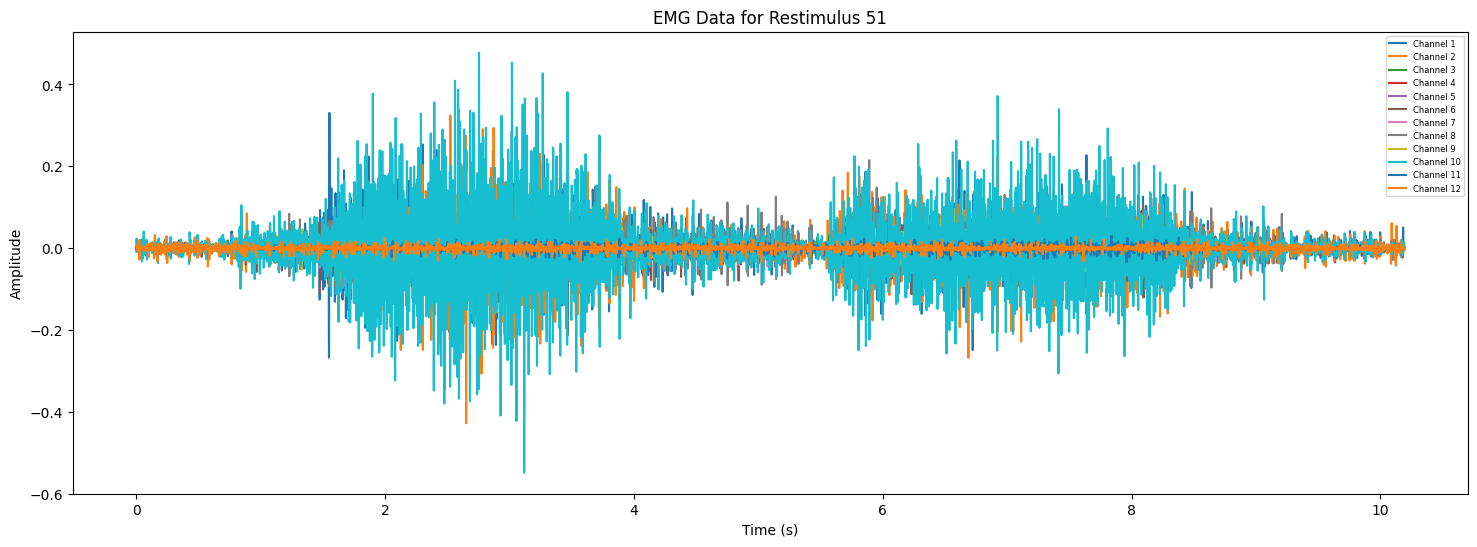

1: Max= 102.12 Hz, Med= 142.05 Hz, Cen= 172.28 Hz
2: Max= 86.82 Hz, Med= 133.42 Hz, Cen= 162.42 Hz
3: Max= 69.16 Hz, Med= 117.04 Hz, Cen= 149.90 Hz
4: Max= 78.87 Hz, Med= 115.96 Hz, Cen= 153.67 Hz
5: Max= 52.58 Hz, Med= 121.94 Hz, Cen= 154.07 Hz
6: Max= 181.19 Hz, Med= 162.46 Hz, Cen= 185.12 Hz
7: Max= 95.94 Hz, Med= 155.00 Hz, Cen= 183.80 Hz
8: Max= 138.81 Hz, Med= 196.50 Hz, Cen= 213.14 Hz
9: Max= 52.39 Hz, Med= 89.57 Hz, Cen= 125.56 Hz
10: Max= 68.77 Hz, Med= 131.06 Hz, Cen= 160.34 Hz
11: Max= 27.37 Hz, Med= 75.93 Hz, Cen= 121.85 Hz
12: Max= 63.77 Hz, Med= 110.17 Hz, Cen= 147.23 Hz


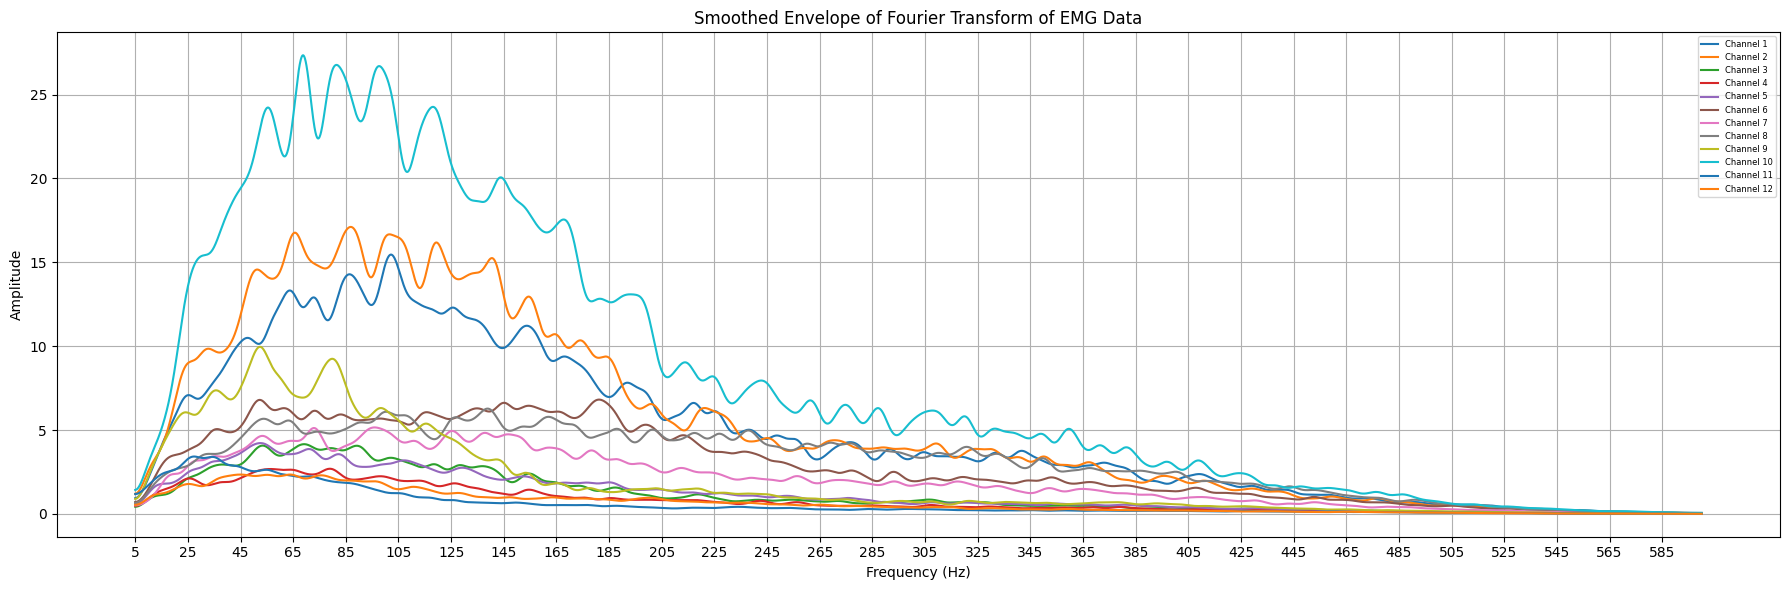

In [7]:
fm = config.DATABASE_INFO[database]['frequency']
fc_highpass = 5.0
fc_lowpass = 500.0

norm_emg = src.extract_emg_channels(df_norm)
filtered_df = src.get_filtered_signal(norm_emg, fc_highpass, fc_lowpass, fm)

meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
filtered_results_df = pd.concat([filtered_df, df_norm[meta_columns]], axis=1)

src.plot_emg_dataframe(database, filtered_results_df, grasp, length=test_time, addFourier=True) #Using the relabeled grasp number and all default parameters

# GET ENVELOPE 
Computes the envelope of an EMG signal using different methods.

### Parameters:
----------
- **emg_signal** : np.array or pd.DataFrame
    - The EMG signal (raw or preprocessed). Can be a NumPy array (1D) or a Pandas DataFrame (each column is a signal).
- **envelope_type** : int
    - Type of envelope to calculate:
        1. Hilbert Transform
        2. Root Mean Square (RMS) with a sliding window
        3. Moving Average with a sliding window
        4. Low-pass filtered absolute signal
        5. Wavelet Transform Envelope
        6. Peak Detection + Interpolation
        7. Teager-Kaiser Energy Operator (TKEO) Envelope
- **window_size** : int, optional
    - Window size for moving RMS or moving average (default: 50 samples).
- **cutoff_freq** : float, optional
    - Cutoff frequency for low-pass filtering (default: 10 Hz).
- **fs** : int, optional
    - Sampling frequency in Hz (default: 2000 Hz).
- **Specific Parameters** (must be modified in src inside the function): 
    - scale=16 for Wavelet Envelope (based on empirical EMG frequency analysis)
    - distance=20 for Peak Interpolation (to avoid too many small peaks)
    
### Returns:
-------
- **np.array or pd.DataFrame**
    - The computed envelope with the same shape as the input.


Extracting data without rest!
Filtered EMG data shape: (20387, 12)
Filtered restimulus data shape: (20387, 1)
test time: 10.1935 seconds
Number of Repetitions: 0


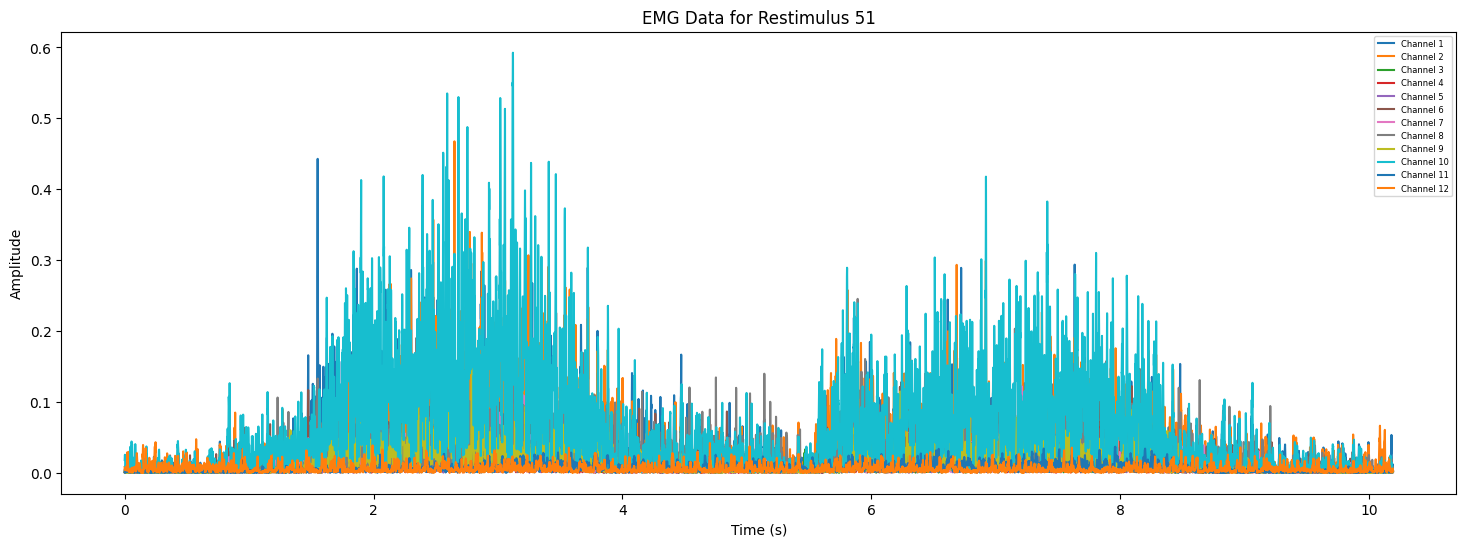

In [8]:
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 500

# Apply envelope extraction to EMG columns
envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=1)

# Preserve non-EMG columns
meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)
src.plot_emg_dataframe(database, result_df, grasp, length=test_time, addFourier=False) #Using the relabeled grasp number and all default parameters


Envelope Type: 1


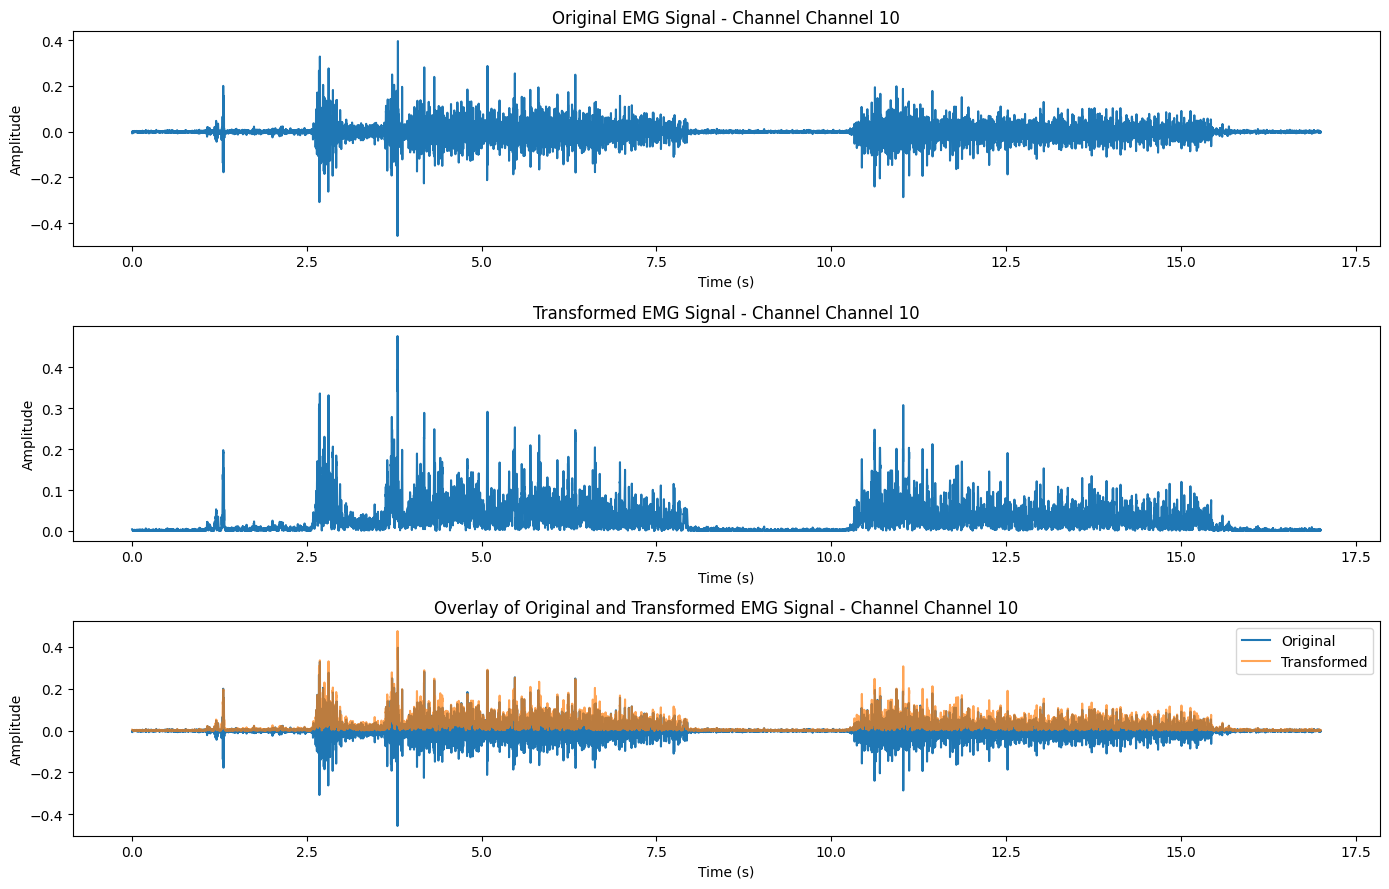

Envelope Type: 6


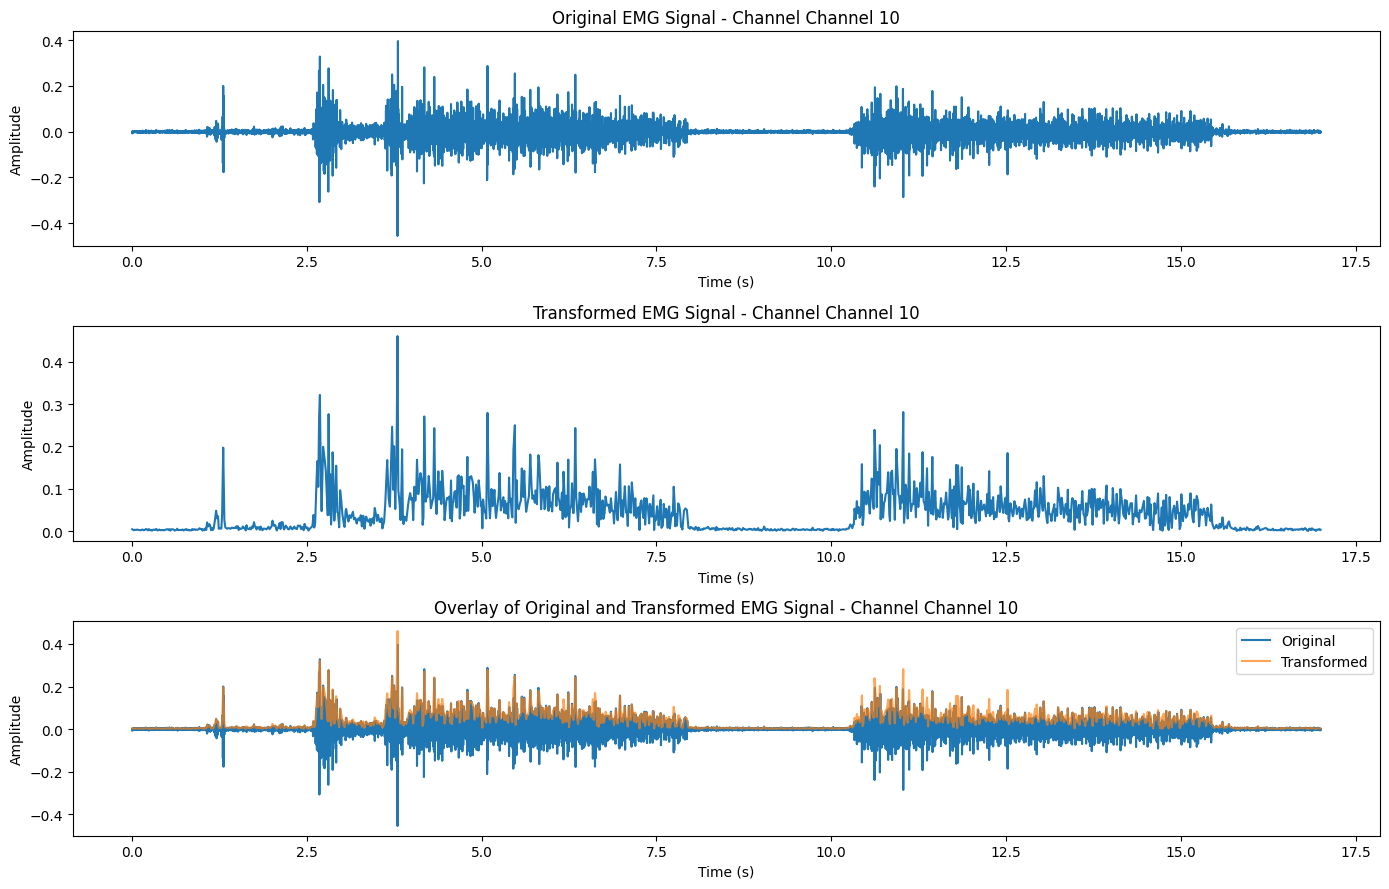

Envelope Type: 7


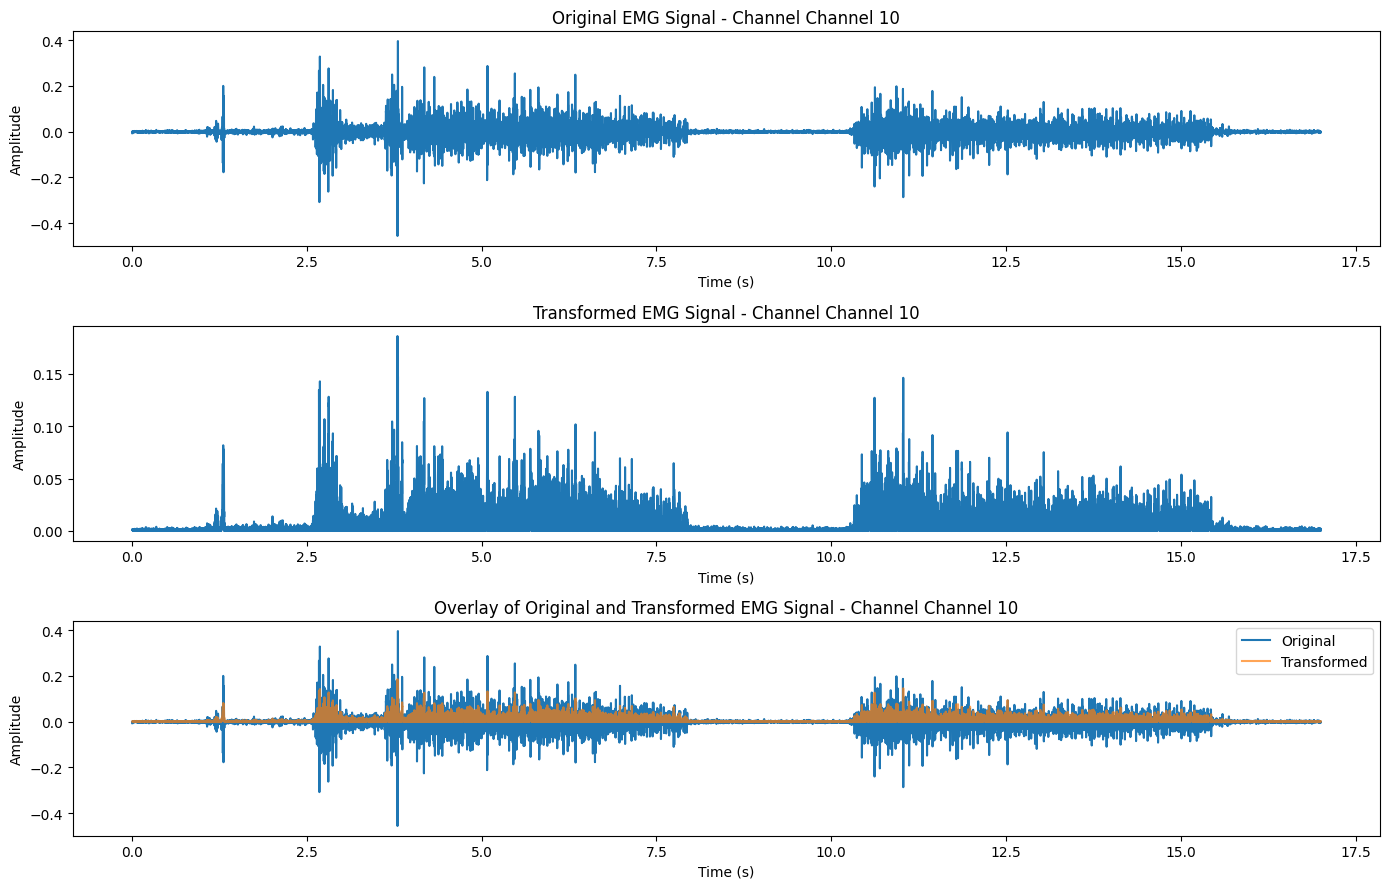

In [9]:
# List of envelope types to iterate over
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 500
envelope_types = [1, 6, 7]

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)
    #envelope_df = src.get_filtered_signal(envelope_df, 5, 50, fm)

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    print(f"Envelope Type: {envelope_type}")

    # Plot the EMG channel for the current envelope type
    src.plot_single_emg_channel(database, df_norm, result_df, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)

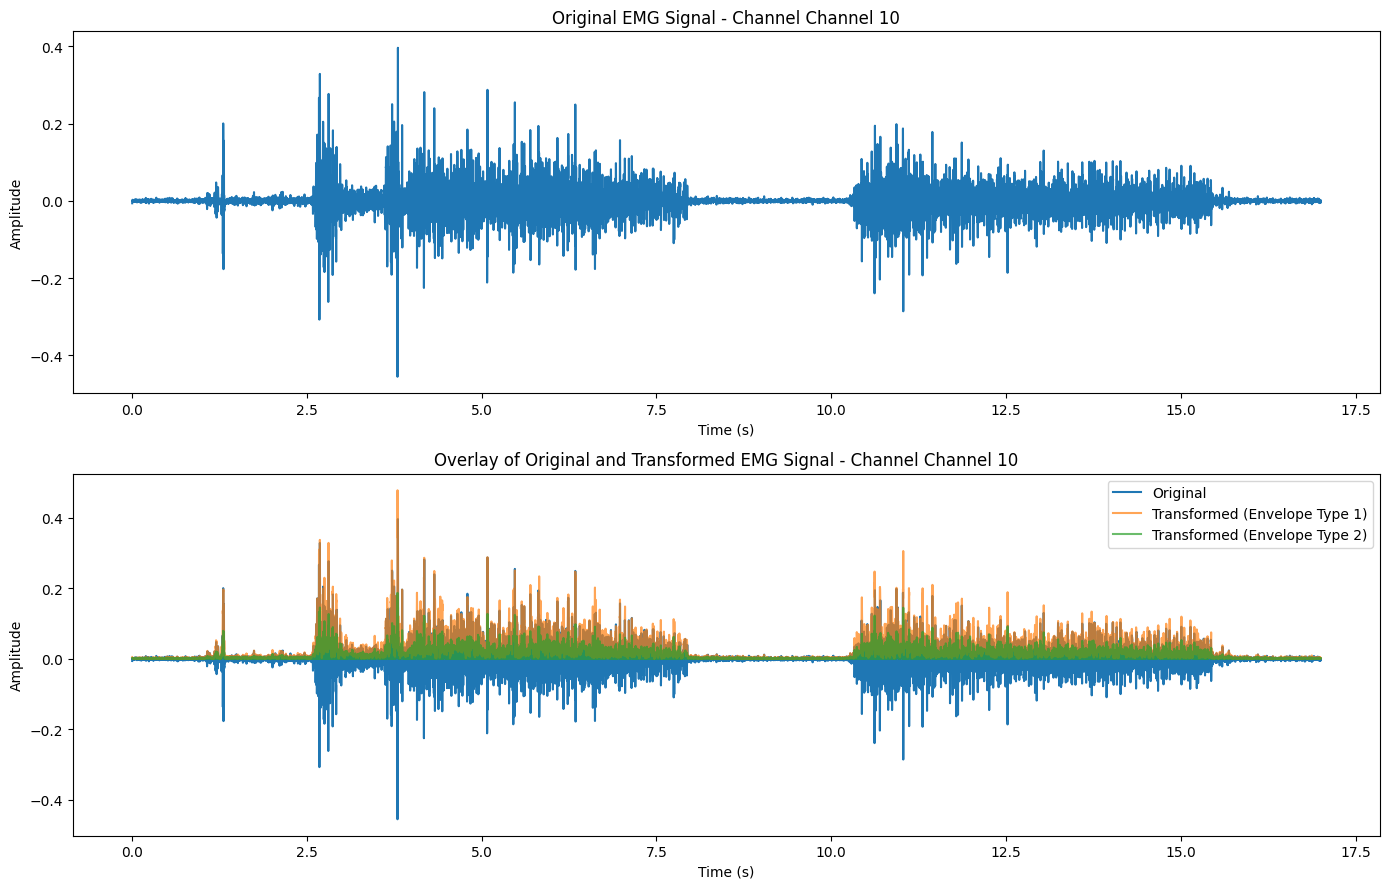

In [10]:
# Select EMG columns (assuming they are the first N columns)
emg_columns = [col for col in df_norm.columns if "Channel" in col]
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 450

# List of envelope types to iterate over
envelope_types = [1, 7]

# List to store transformed DataFrames
transformed_dfs = []

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    transformed_dfs.append(result_df)

# Plot the EMG channel with all envelope types
src.plot_emg_channel_with_envelopes(database, df_norm, transformed_dfs, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)

### Lowpass filter

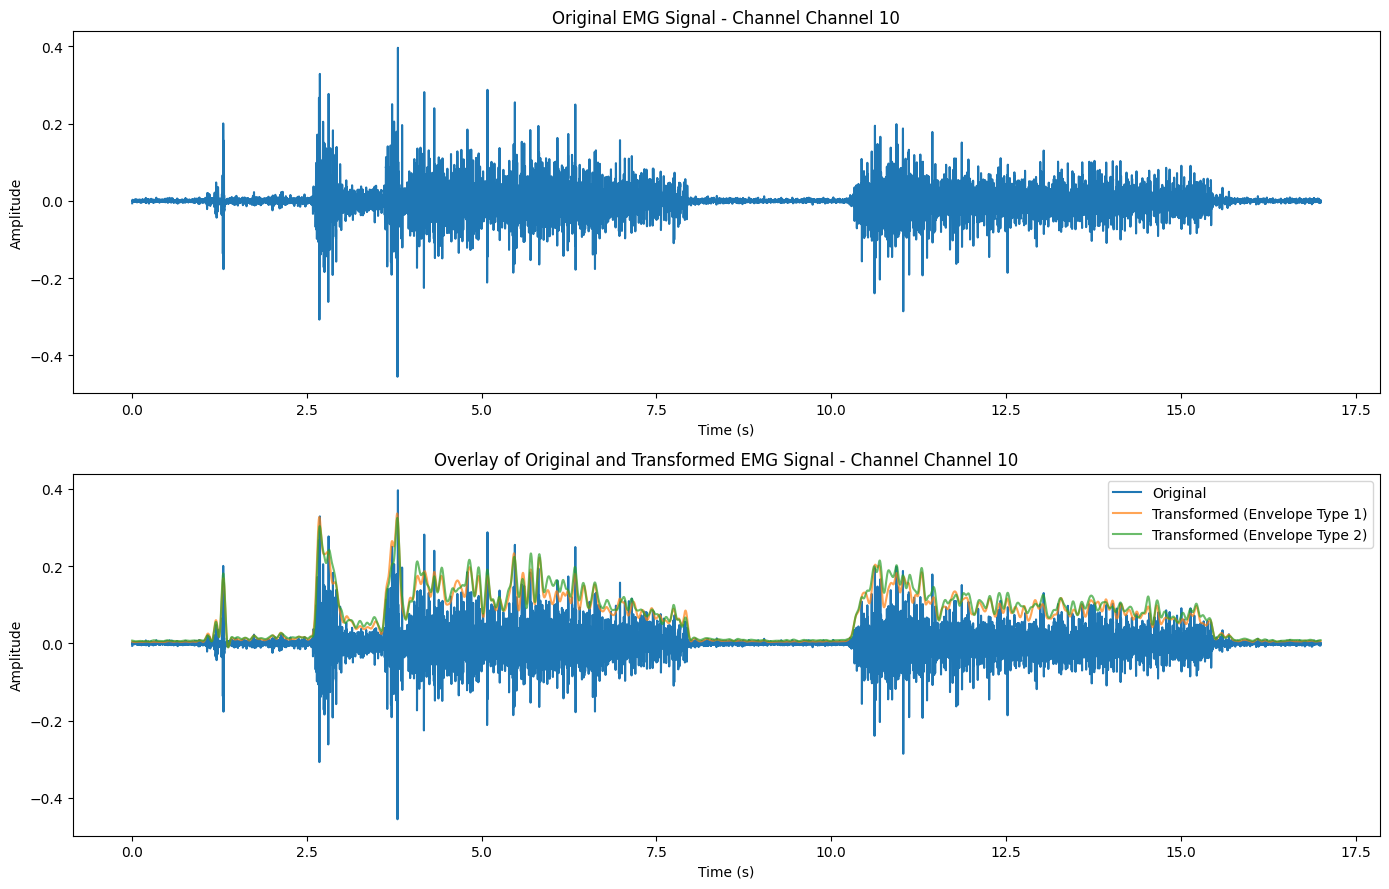

In [11]:
from scipy.signal import butter, filtfilt

def apply_low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Select EMG columns (assuming they are the first N columns)
emg_columns = [col for col in df_norm.columns if "Channel" in col]
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 450
cutoff_freq = 10  # Low-pass filter cutoff frequency

# List of envelope types to iterate over
envelope_types = [1, 7]

# List to store transformed DataFrames
transformed_dfs = []

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)
    
    # Apply low-pass filter to each column in envelope_df
    envelope_df = envelope_df.apply(lambda x: apply_low_pass_filter(x, cutoff_freq, fm), axis=0)

    # Normalize by the max absolute value across all channels
    global_max = envelope_df.abs().values.max()
    if global_max != 0:
        envelope_df = envelope_df / global_max

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    transformed_dfs.append(result_df)

# Plot the EMG channel with all envelope types
src.plot_emg_channel_with_envelopes(database, df_norm, transformed_dfs, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)

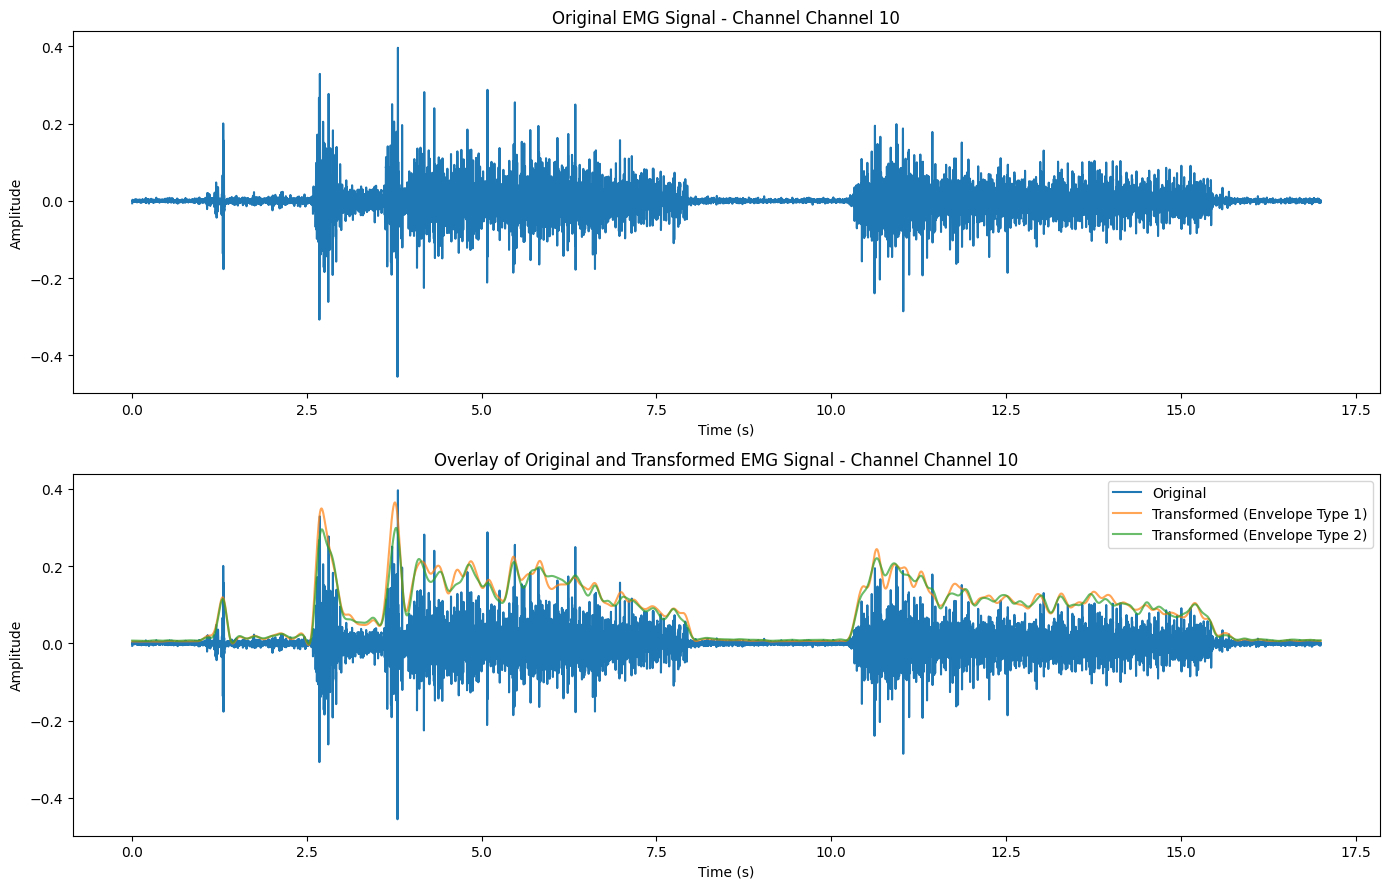

In [12]:
from scipy.signal import butter, filtfilt

def apply_low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Select EMG columns (assuming they are the first N columns)
emg_columns = [col for col in df_norm.columns if "Channel" in col]
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 450
cutoff_freq = 5  # Low-pass filter cutoff frequency

# List of envelope types to iterate over
envelope_types = [1, 7]

# List to store transformed DataFrames
transformed_dfs = []

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)
    
    # Apply low-pass filter to each column in envelope_df
    envelope_df = envelope_df.apply(lambda x: apply_low_pass_filter(x, cutoff_freq, fm), axis=0)

    # Normalize by the max absolute value across all channels
    global_max = envelope_df.abs().values.max()
    if global_max != 0:
        envelope_df = envelope_df / global_max

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    transformed_dfs.append(result_df)

# Plot the EMG channel with all envelope types
src.plot_emg_channel_with_envelopes(database, df_norm, transformed_dfs, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)

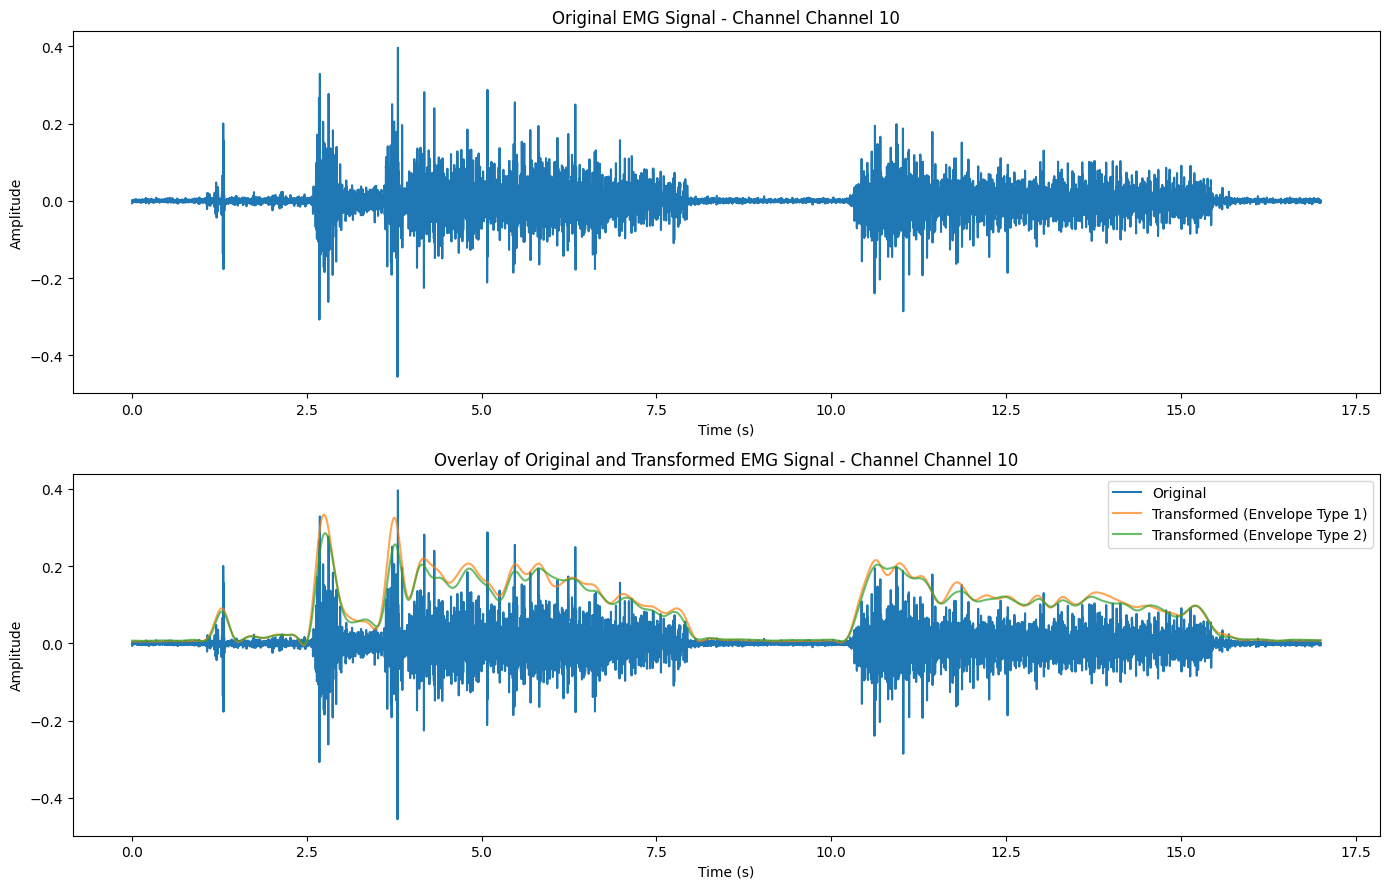

In [13]:
from scipy.signal import butter, filtfilt

def apply_low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Select EMG columns (assuming they are the first N columns)
emg_columns = [col for col in df_norm.columns if "Channel" in col]
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 450
cutoff_freq = 3  # Low-pass filter cutoff frequency

# List of envelope types to iterate over
envelope_types = [1, 7]

# List to store transformed DataFrames
transformed_dfs = []

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)
    
    # Apply low-pass filter to each column in envelope_df
    envelope_df = envelope_df.apply(lambda x: apply_low_pass_filter(x, cutoff_freq, fm), axis=0)

    # Normalize by the max absolute value across all channels
    global_max = envelope_df.abs().values.max()
    if global_max != 0:
        envelope_df = envelope_df / global_max

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    transformed_dfs.append(result_df)

# Plot the EMG channel with all envelope types
src.plot_emg_channel_with_envelopes(database, df_norm, transformed_dfs, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)

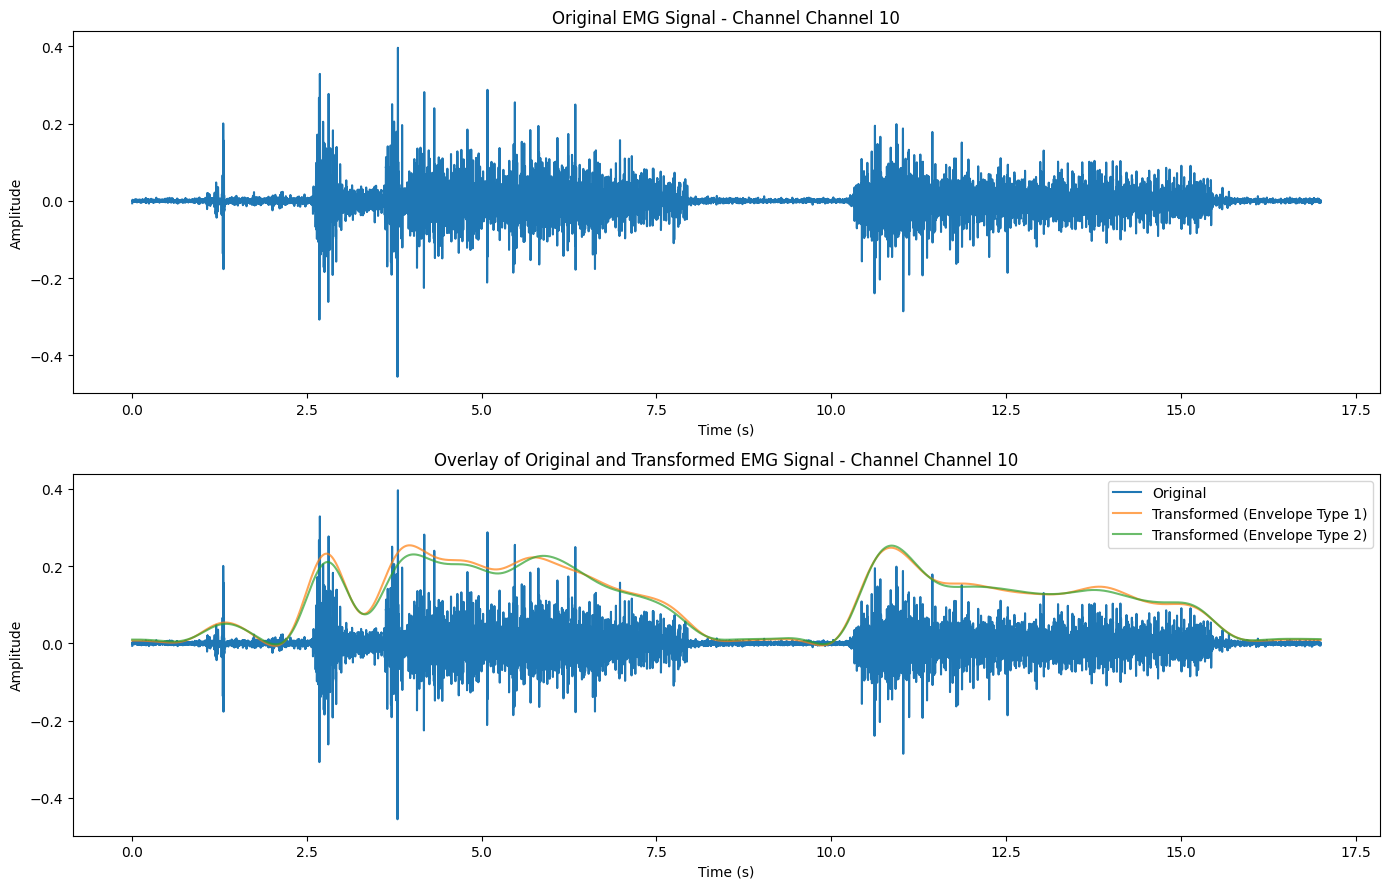

In [14]:
from scipy.signal import butter, filtfilt

def apply_low_pass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

# Select EMG columns (assuming they are the first N columns)
emg_columns = [col for col in df_norm.columns if "Channel" in col]
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 450
cutoff_freq = 1  # Low-pass filter cutoff frequency

# List of envelope types to iterate over
envelope_types = [1, 7]

# List to store transformed DataFrames
transformed_dfs = []

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)
    
    # Apply low-pass filter to each column in envelope_df
    envelope_df = envelope_df.apply(lambda x: apply_low_pass_filter(x, cutoff_freq, fm), axis=0)

    # Normalize by the max absolute value across all channels
    global_max = envelope_df.abs().values.max()
    if global_max != 0:
        envelope_df = envelope_df / global_max

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    transformed_dfs.append(result_df)

# Plot the EMG channel with all envelope types
src.plot_emg_channel_with_envelopes(database, df_norm, transformed_dfs, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)

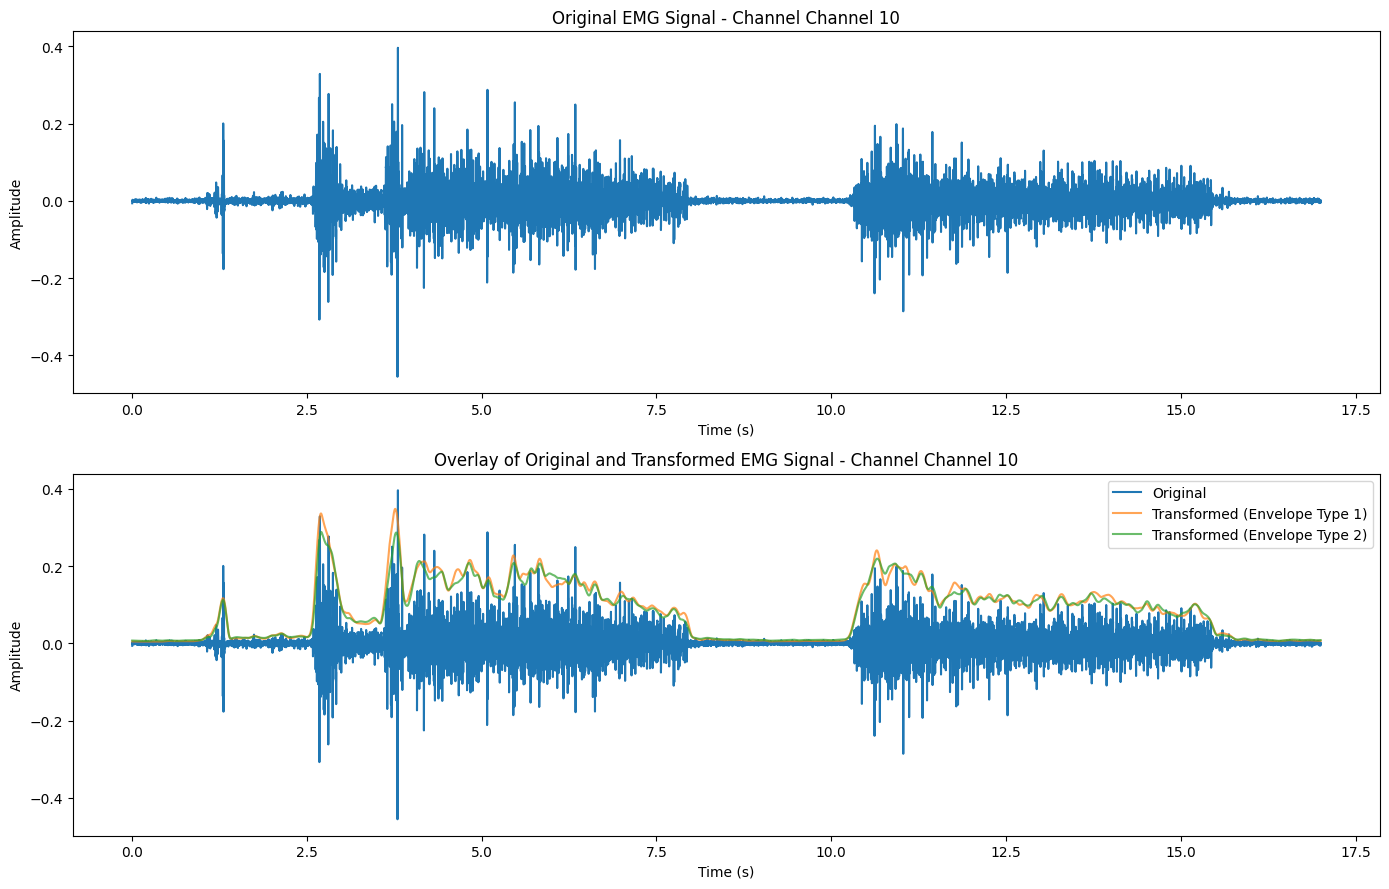

In [18]:
import numpy as np

def apply_hanning_window(signal, window_size):
    window = np.hanning(window_size)
    return np.convolve(signal, window / window.sum(), mode='same')

# Select EMG columns (assuming they are the first N columns)
emg_columns = [col for col in df_norm.columns if "Channel" in col]
fm = config.DATABASE_INFO[database]['frequency']
fc_low = 10
fc_high = 450
window_size = 400  # Size of the Hanning window

# List of envelope types to iterate over
envelope_types = [1, 7]

# List to store transformed DataFrames
transformed_dfs = []

for envelope_type in envelope_types:
    # Apply envelope extraction to EMG columns
    envelope_df = src.get_envelope_filtered(src.extract_emg_channels(df_norm), fc_low, fc_high, fm, envelope_type=envelope_type)
    
    # Apply Hanning window to each column in envelope_df
    envelope_df = envelope_df.apply(lambda x: apply_hanning_window(x, window_size), axis=0)

    # Normalize by the max absolute value across all channels
    global_max = envelope_df.abs().values.max()
    if global_max != 0:
        envelope_df = envelope_df / global_max

    # Preserve non-EMG columns
    meta_columns = ["Time (s)", "subject", "re_repetition", "stimulus", "relabeled"]
    result_df = pd.concat([envelope_df, df_norm[meta_columns]], axis=1)

    transformed_dfs.append(result_df)

# Plot the EMG channel with all envelope types
src.plot_emg_channel_with_envelopes(database, df_norm, transformed_dfs, channel='Channel 10', addFourier=False, start=5000, end=5000+fm*test_time)